In [1]:
using Pkg
Pkg.add("Images")
using Images

   Resolving package versions...
  No Changes to `C:\Users\MuhammadAli\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\MuhammadAli\.julia\environments\v1.10\Manifest.toml`


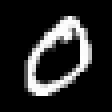

In [2]:
img = load("training/0/1.png")

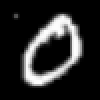

In [3]:
size(img)
typeof(img)
img[5,5] = Gray(0.5)
img[5,5] = RGB(1,0.5,0)
img2 = img[1:10,1:20]
img3 = img[5:22,5:22]
img4 = Gray.(img)
img5 = RGB.(img)
img6 = (x-> Gray(1)-x.val).(img)
img6 = imresize(img,(50,50))

In [4]:
data = Float32.(channelview(img))

28×28 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0       0.0  0.0       …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.592157  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0       …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                             ⋮              ⋱                 ⋮         
 0.0  0.0  0.0  0.0  0.0       0.0  0.337255     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0  0.333333

In [5]:
path = "training"
X = []
y = []
for label in readdir(path)
    for file in readdir("$path/$label")
        img = load("$path/$label/$file")
        data = reshape(Float32.(channelview(img)),28,28,1)
        if length(X) == 0
            X = data
        else
            X = cat(X,data,dims=3)
        end
        push!(y,parse(Float32,label))
    end
end

In [6]:
using Images
function createDataset(path)
    X = []
    y = []
    for label in readdir(path)
        for file in readdir("$path/$label")
            img = load("$path/$label/$file")
            data = reshape(Float32.(channelview(img)),28,28,1)
            if length(X) == 0
                X = data
            else
                X = cat(X,data,dims=3)
            end
            push!(y,parse(Float32,label))
        end
    end
    return X,y
end

createDataset (generic function with 1 method)

In [7]:
x_train, y_train = createDataset("training")
x_test, y_test = createDataset("testing")

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Any[0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0  …  9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0])

In [8]:
using Pkg
Pkg.add("Flux")
using Flux

   Resolving package versions...
  No Changes to `C:\Users\MuhammadAli\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\MuhammadAli\.julia\environments\v1.10\Manifest.toml`


In [9]:
model = Chain(
    Flux.flatten,
    Dense(784=>15,relu),
    Dense(15=>10,sigmoid),
    softmax
)

Chain(
  Flux.flatten,
  Dense(784 => 15, relu),               # 11_775 parameters
  Dense(15 => 10, σ),                   # 160 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 11_935 parameters, 46.871 KiB.

In [10]:
predict = model(Flux.unsqueeze(x_train[:,:,1],dims=3))

10×1 Matrix{Float32}:
 0.08498719
 0.09651777
 0.10816507
 0.07430719
 0.09521105
 0.11835423
 0.10502416
 0.10928595
 0.10027607
 0.107871346

In [11]:
y_train[1]

0.0f0

In [12]:
# Assemble the training data
data = Flux.DataLoader((x_train,y_train), shuffle=true)

# Initialize the ADAM optimizer with default settings
optimizer = Flux.setup(Adam(), model)

# Define the loss function that uses the cross-entropy to 
# measure the error by comparing model predictions of data 
# row "x" with true data label in the "y"
function loss(model, x, y)
	return Flux.crossentropy(model(x),Flux.onehotbatch(y,0:9))
end

# Train the model 10 times in a loop
for epoch in 1:10
	Flux.train!(loss, model, data, optimizer)
end

In [13]:
predict = model(Flux.unsqueeze(x_train[:,:,1],dims=3))

10×1 Matrix{Float32}:
 0.23196934
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675

In [14]:
function accuracy()
    correct = 0
    for index in 1:length(y_test)
        probs = model(Flux.unsqueeze(x_test[:,:,index],dims=3))
        predicted_digit = argmax(probs)[1]-1
        if predicted_digit == y_test[index]
            correct +=1
        end
    end
    return correct/length(y_test)
end

accuracy (generic function with 1 method)

In [15]:
for epoch in 1:10
    Flux.train!(loss, model, data, optimizer)
    println(accuracy())
end

0.9246
0.9164
0.9216
0.9182
0.9231
0.9176
0.9123
0.9162
0.9124
0.9043


In [16]:
model = Chain(
    Conv((5,5),1=>6,relu),
    Flux.flatten,
    Dense(4704=>15,relu),
    Dense(15=>10,sigmoid),
    softmax
)

Chain(
  Conv((5, 5), 1 => 6, relu),           # 156 parameters
  Flux.flatten,
  Dense(4704 => 15, relu),              # 70_575 parameters
  Dense(15 => 10, σ),                   # 160 parameters
  NNlib.softmax,
)                   # Total: 6 arrays, 70_891 parameters, 277.520 KiB.

In [17]:
model = Chain(
    Conv((5,5),1=>6,relu),
    MaxPool((2,2)),
    Flux.flatten,
    Dense(1176=>15,relu),
    Dense(15=>10,sigmoid),
    softmax
)

Chain(
  Conv((5, 5), 1 => 6, relu),           # 156 parameters
  MaxPool((2, 2)),
  Flux.flatten,
  Dense(1176 => 15, relu),              # 17_655 parameters
  Dense(15 => 10, σ),                   # 160 parameters
  NNlib.softmax,
)                   # Total: 6 arrays, 17_971 parameters, 70.926 KiB.

In [18]:
model = Chain(
    Conv((5,5),1 => 6, relu),
    MaxPool((2,2)),
    Conv((5,5),6 => 16, relu),
    MaxPool((2,2)),
    Flux.flatten,
    Dense(256=>120,relu),
    Dense(120=>84, relu),
    Dense(84=>10, sigmoid),
    softmax
)

Chain(
  Conv((5, 5), 1 => 6, relu),           # 156 parameters
  MaxPool((2, 2)),
  Conv((5, 5), 6 => 16, relu),          # 2_416 parameters
  MaxPool((2, 2)),
  Flux.flatten,
  Dense(256 => 120, relu),              # 30_840 parameters
  Dense(120 => 84, relu),               # 10_164 parameters
  Dense(84 => 10, σ),                   # 850 parameters
  NNlib.softmax,
)                   # Total: 10 arrays, 44_426 parameters, 174.867 KiB.

In [19]:
model = Chain(
    Conv((5,5),1 => 6, relu),
    MaxPool((2,2)),
    Conv((5,5),6 => 16, relu),
    MaxPool((2,2)),
    Flux.flatten,
    Dense(256=>120,relu),
    Dense(120=>84, relu),
    Dense(84=>10, sigmoid),
    softmax
)

# Function to measure the model accuracy
function accuracy()
    correct = 0
    for index in 1:length(y_test)
        probs = model(Flux.unsqueeze(x_test[:,:,:,index],dims=4))
        predicted_digit = argmax(probs)[1]-1
        if predicted_digit == y_test[index]
            correct +=1
        end
    end
    return correct/length(y_test)
end

# Reshape the data
x_train = reshape(x_train, 28, 28, 1, :)
x_test = reshape(x_test, 28, 28, 1, :)

# Assemble the training data
train_data = Flux.DataLoader((x_train,y_train), shuffle=true)

# Initialize the ADAM optimizer with default settings
optimizer = Flux.setup(Adam(), model)

# Define the loss function that uses the cross-entropy to 
# measure the error by comparing model predictions of 
# data row "x" with true data from label "y"
function loss(model, x, y)
	return Flux.crossentropy(model(x),Flux.onehotbatch(y,0:9))
end

# Train model 10 times in a loop
for epoch in 1:10
    Flux.train!(loss, model, train_data, optimizer)
    println(accuracy())
end

0.9542
0.9612
0.947
0.9412
0.923
0.951
0.9605
0.9429
0.9407
0.9285


In [20]:
import Pkg
Pkg.add("BSON")

   Resolving package versions...
   Installed BSON ─ v0.3.9
    Updating `C:\Users\MuhammadAli\.julia\environments\v1.10\Project.toml`
  [fbb218c0] + BSON v0.3.9
    Updating `C:\Users\MuhammadAli\.julia\environments\v1.10\Manifest.toml`
  [fbb218c0] + BSON v0.3.9
Precompiling project...
  ✓ BSON
  1 dependency successfully precompiled in 7 seconds. 304 already precompiled.


In [21]:
using BSON
BSON.@save "digits.bson" model